In [1]:
import os
os.chdir("/gpfs/home/asun/jin_lab/get/GEARS/demo/")
print(os.getcwd())
import sys
sys.path.append(os.path.abspath('..'))

from gears import PertData, GEARS

/gpfs/group/jin/asun/get/GEARS/demo


/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: Futur

In [17]:
import importlib
import gears.model
importlib.reload(gears)
importlib.reload(gears.model)

from gears import PertData, GEARS

In [2]:
import torch
print(torch.cuda.device_count())

2


Load data. We use norman as an example.

In [2]:
pert_data = PertData('./data') # specific saved folder
pert_data.load(data_path = './data/zheng_get') # load the processed data, the path is saved folder + dataset_name
pert_data.prepare_split(split = 'simulation_single', seed = 1) # get data split with seed
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128) # prepare data loader

Found local copy...


Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
[]
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Done!
Creating dataloaders....
Done!


here1


Create a model object; if you use [wandb](https://wandb.ai), you can easily track model training and evaluation by setting `weight_bias_track` to true, and specify the `proj_name` and `exp_name` that you like.

In [3]:
gears_model = GEARS(pert_data, device = 'cuda:0', 
                        weight_bias_track = False, 
                        proj_name = 'gears', 
                        exp_name = 'zheng_get')


In [4]:
gears_model

In [4]:
gears_model.model_initialize(hidden_size = 64)

Found local copy...


You can find available tunable parameters in model_initialize via

In [6]:
gears_model.tunable_parameters()

{'hidden_size': 'hidden dimension, default 64',
 'num_go_gnn_layers': 'number of GNN layers for GO graph, default 1',
 'num_gene_gnn_layers': 'number of GNN layers for co-expression gene graph, default 1',
 'decoder_hidden_size': 'hidden dimension for gene-specific decoder, default 16',
 'num_similar_genes_go_graph': 'number of maximum similar K genes in the GO graph, default 20',
 'num_similar_genes_co_express_graph': 'number of maximum similar K genes in the co expression graph, default 20',
 'coexpress_threshold': 'pearson correlation threshold when constructing coexpression graph, default 0.4',
 'uncertainty': 'whether or not to turn on uncertainty mode, default False',
 'uncertainty_reg': 'regularization term to balance uncertainty loss and prediction loss, default 1',
 'direction_lambda': 'regularization term to balance direction loss and prediction loss, default 1'}

Train your model:

Note: For the sake of demo, we set epoch size to 1. To get full model, set `epochs = 20`.

In [5]:
gears_model.train(epochs = 20, lr = 1e-3)

Start Training...


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32


Epoch 1 Step 1 Train Loss: 0.3427


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 1 Step 51 Train Loss: 0.3574


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 1 Step 101 Train Loss: 0.4176


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 1 Step 151 Train Loss: 0.3992


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 1 Step 201 Train Loss: 0.3569


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 1: Train Overall MSE: 0.0025 Validation Overall MSE: 0.0010. 
Train Top 20 DE MSE: 0.0058 Validation Top 20 DE MSE: 0.0082. 
Epoch 2 Step 1 Train Loss: 0.4356


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 2 Step 51 Train Loss: 0.3844


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 2 Step 101 Train Loss: 0.4513


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 2 Step 151 Train Loss: 0.3835


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 2 Step 201 Train Loss: 0.3518


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 2: Train Overall MSE: 0.0010 Validation Overall MSE: 0.0010. 
Train Top 20 DE MSE: 0.0039 Validation Top 20 DE MSE: 0.0090. 
Epoch 3 Step 1 Train Loss: 0.3430


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 3 Step 51 Train Loss: 0.3720


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 3 Step 101 Train Loss: 0.3537


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 3 Step 151 Train Loss: 0.4227


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 3 Step 201 Train Loss: 0.3380


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 3: Train Overall MSE: 0.0013 Validation Overall MSE: 0.0017. 
Train Top 20 DE MSE: 0.0052 Validation Top 20 DE MSE: 0.0104. 
Epoch 4 Step 1 Train Loss: 0.3958


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 4 Step 51 Train Loss: 0.4471


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 4 Step 101 Train Loss: 0.4168


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 4 Step 151 Train Loss: 0.3856


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 4 Step 201 Train Loss: 0.4355


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 4: Train Overall MSE: 0.0007 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0028 Validation Top 20 DE MSE: 0.0071. 
Epoch 5 Step 1 Train Loss: 0.3776


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 5 Step 51 Train Loss: 0.3571


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 5 Step 101 Train Loss: 0.3289


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 5 Step 151 Train Loss: 0.3390


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 5 Step 201 Train Loss: 0.4097


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 5: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0005. 
Train Top 20 DE MSE: 0.0034 Validation Top 20 DE MSE: 0.0075. 
Epoch 6 Step 1 Train Loss: 0.3339


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 6 Step 51 Train Loss: 0.3956


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 6 Step 101 Train Loss: 0.3370


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 6 Step 151 Train Loss: 0.3691


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 6 Step 201 Train Loss: 0.3641


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 6: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0005. 
Train Top 20 DE MSE: 0.0032 Validation Top 20 DE MSE: 0.0073. 
Epoch 7 Step 1 Train Loss: 0.3580


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 7 Step 51 Train Loss: 0.4060


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 7 Step 101 Train Loss: 0.3851


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 7 Step 151 Train Loss: 0.3870


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 7 Step 201 Train Loss: 0.3943


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch

Epoch 7: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0005. 
Train Top 20 DE MSE: 0.0032 Validation Top 20 DE MSE: 0.0072. 
Epoch 8 Step 1 Train Loss: 0.3380


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 8 Step 51 Train Loss: 0.4227


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 8 Step 101 Train Loss: 0.3627


emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([7

Epoch 8 Step 151 Train Loss: 0.4039


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 8 Step 201 Train Loss: 0.3598


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 8: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0005. 
Train Top 20 DE MSE: 0.0030 Validation Top 20 DE MSE: 0.0074. 
Epoch 9 Step 1 Train Loss: 0.3484


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 9 Step 51 Train Loss: 0.3642


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 9 Step 101 Train Loss: 0.3255


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 9 Step 151 Train Loss: 0.3569


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 9 Step 201 Train Loss: 0.3719


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 9: Train Overall MSE: 0.0005 Validation Overall MSE: 0.0005. 
Train Top 20 DE MSE: 0.0033 Validation Top 20 DE MSE: 0.0074. 
Epoch 10 Step 1 Train Loss: 0.3471


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 10 Step 51 Train Loss: 0.3944


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 10 Step 101 Train Loss: 0.3608


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 10 Step 151 Train Loss: 0.3554


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch

Epoch 10 Step 201 Train Loss: 0.3587


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 10: Train Overall MSE: 0.0005 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0032 Validation Top 20 DE MSE: 0.0074. 
Epoch 11 Step 1 Train Loss: 0.3681


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 11 Step 51 Train Loss: 0.3402


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 11 Step 101 Train Loss: 0.3681


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 11 Step 151 Train Loss: 0.3366


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch

Epoch 11 Step 201 Train Loss: 0.4161


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 11: Train Overall MSE: 0.0005 Validation Overall MSE: 0.0005. 
Train Top 20 DE MSE: 0.0032 Validation Top 20 DE MSE: 0.0073. 
Epoch 12 Step 1 Train Loss: 0.3357


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 12 Step 51 Train Loss: 0.3856


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 12 Step 101 Train Loss: 0.3684


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 12 Step 151 Train Loss: 0.3561


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 12 Step 201 Train Loss: 0.3559


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch

Epoch 12: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0007. 
Train Top 20 DE MSE: 0.0033 Validation Top 20 DE MSE: 0.0076. 
Epoch 13 Step 1 Train Loss: 0.4264


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 13 Step 51 Train Loss: 0.3507


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 13 Step 101 Train Loss: 0.3645


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 13 Step 151 Train Loss: 0.3360


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 13 Step 201 Train Loss: 0.3367


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 13: Train Overall MSE: 0.0005 Validation Overall MSE: 0.0007. 
Train Top 20 DE MSE: 0.0033 Validation Top 20 DE MSE: 0.0076. 
Epoch 14 Step 1 Train Loss: 0.4199


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 14 Step 51 Train Loss: 0.3336


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 14 Step 101 Train Loss: 0.3769


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 14 Step 151 Train Loss: 0.3431


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 14 Step 201 Train Loss: 0.4140


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 14: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0030 Validation Top 20 DE MSE: 0.0075. 
Epoch 15 Step 1 Train Loss: 0.3523


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 15 Step 51 Train Loss: 0.4267


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 15 Step 101 Train Loss: 0.3765


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 15 Step 151 Train Loss: 0.3700


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 15 Step 201 Train Loss: 0.3343


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 15: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0005. 
Train Top 20 DE MSE: 0.0030 Validation Top 20 DE MSE: 0.0074. 
Epoch 16 Step 1 Train Loss: 0.3868


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.

Epoch 16 Step 51 Train Loss: 0.3730


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 16 Step 101 Train Loss: 0.3875


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 16 Step 151 Train Loss: 0.3993


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 16 Step 201 Train Loss: 0.3877


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 16: Train Overall MSE: 0.0005 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0032 Validation Top 20 DE MSE: 0.0074. 
Epoch 17 Step 1 Train Loss: 0.3566


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 17 Step 51 Train Loss: 0.3577


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 17 Step 101 Train Loss: 0.3531


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 17 Step 151 Train Loss: 0.3329


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 17 Step 201 Train Loss: 0.4010


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 17: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0031 Validation Top 20 DE MSE: 0.0075. 
Epoch 18 Step 1 Train Loss: 0.3573


emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([1

Epoch 18 Step 51 Train Loss: 0.3911


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 18 Step 101 Train Loss: 0.4161


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 18 Step 151 Train Loss: 0.3731


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 18 Step 201 Train Loss: 0.3754


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 18: Train Overall MSE: 0.0005 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0032 Validation Top 20 DE MSE: 0.0075. 
Epoch 19 Step 1 Train Loss: 0.3738


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 19 Step 51 Train Loss: 0.3997


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 19 Step 101 Train Loss: 0.4000


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 19 Step 151 Train Loss: 0.3354


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 19 Step 201 Train Loss: 0.3177


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 19: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0030 Validation Top 20 DE MSE: 0.0074. 
Epoch 20 Step 1 Train Loss: 0.3734


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size

Epoch 20 Step 51 Train Loss: 0.3869


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 20 Step 101 Train Loss: 0.4040


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch

Epoch 20 Step 151 Train Loss: 0.3848


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 20 Step 201 Train Loss: 0.3466


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Siz

Epoch 20: Train Overall MSE: 0.0006 Validation Overall MSE: 0.0006. 
Train Top 20 DE MSE: 0.0031 Validation Top 20 DE MSE: 0.0075. 
Done!
Start Testing...


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([18720, 64])
emb shape 3: torch.Size([18720, 64])
base_emb shape: torch.Size([18720, 64])
pos_emb shape: torch.Size([18720, 64])
2340
8
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.

Best performing model: Test Top 20 DE MSE: 0.0034


base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch.Size([74880, 64])
2340
32
self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([74880, 64])
emb shape 3: torch.Size([74880, 64])
base_emb shape: torch.Size([74880, 64])
pos_emb shape: torch

Done!


Save and load pretrained models:

In [6]:
gears_model.save_model('zheng_model_get')
gears_model.load_pretrained('zheng_model_get')

Make prediction for new perturbation:

In [7]:
gears_model = GEARS(pert_data, device = 'cuda:0')
gears_model.load_pretrained('zheng_model_get')

In [8]:
adata = gears_model.adata
cond2name = dict(adata.obs[['condition', 'condition_name']].values)

print(list(adata.uns['top_non_dropout_de_20'].keys()))
print(list(cond2name.keys()))

['Neuron_FOXG1+ctrl_1+1', 'Neuron_NR2F1+ctrl_1+1', 'Neuron_TBR1+ctrl_1+1', 'Neuron_TCF4+ctrl_1+1']
['NR2F1+ctrl', 'ctrl', 'TCF4+ctrl', 'FOXG1+ctrl', 'TBR1+ctrl']


self emb shape: torch.Size([2340, 768])
emb shape: torch.Size([2340, 64])
emb shape 2: torch.Size([702000, 64])
emb shape 3: torch.Size([702000, 64])
base_emb shape: torch.Size([702000, 64])
pos_emb shape: torch.Size([702000, 64])
2340
300


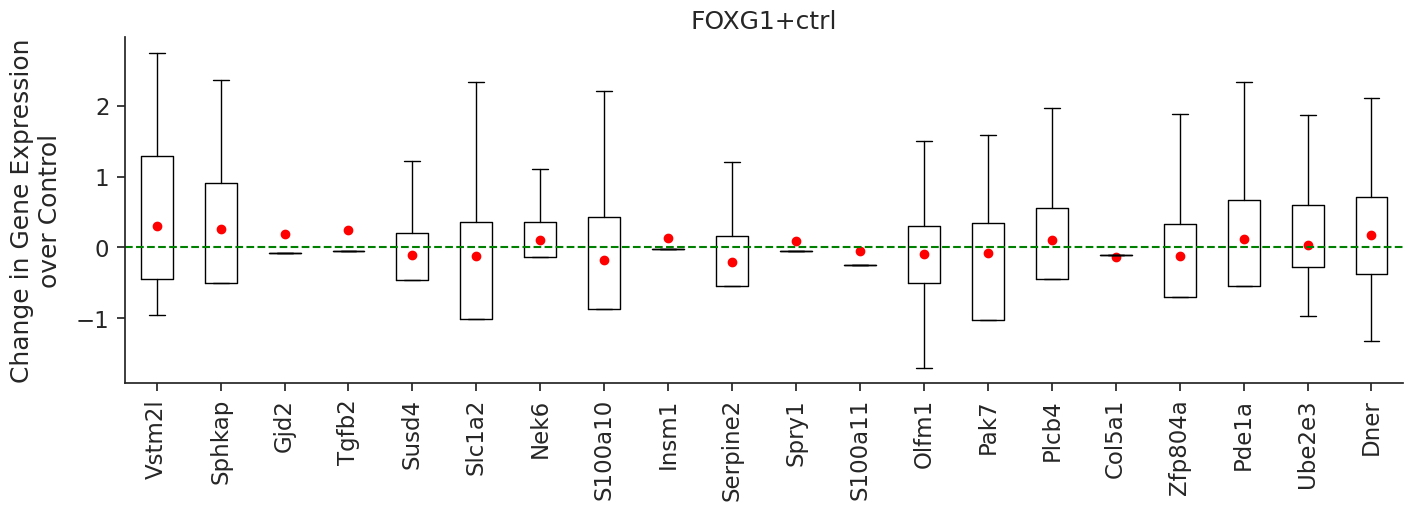

In [9]:
gears_model.plot_perturbation('FOXG1+ctrl')

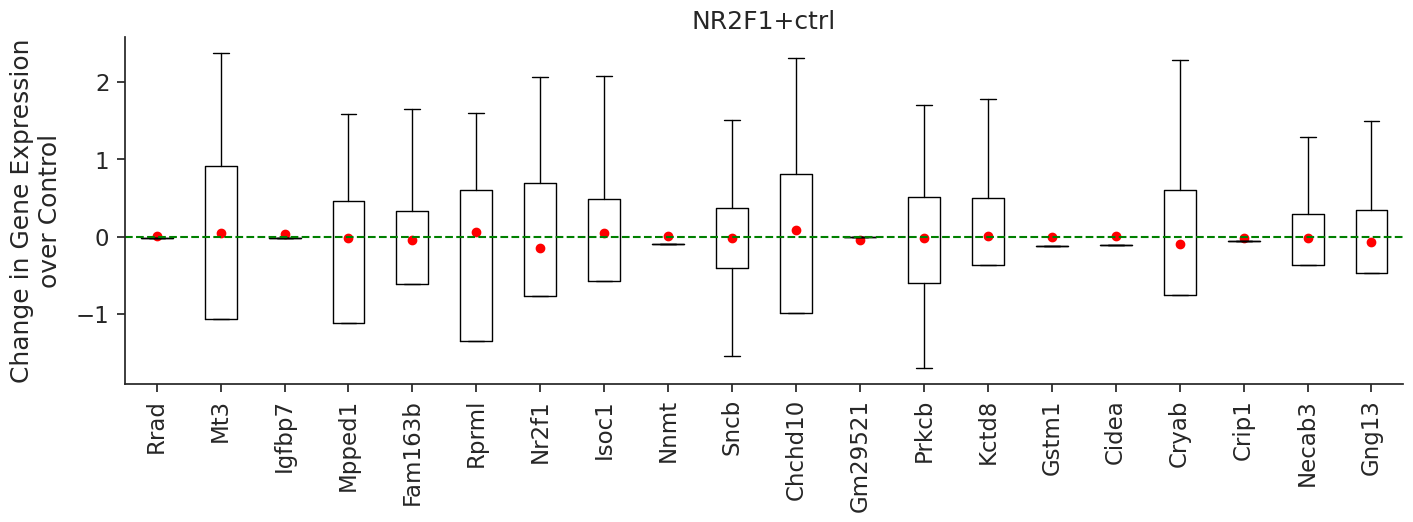

In [5]:
gears_model.plot_perturbation('NR2F1+ctrl')

In [24]:
gears_model.predict([['FEV'], ['FEV', 'AHR']])

{'FEV': array([-1.6480488e-13,  1.9913395e-03,  2.9681461e-02, ...,
         3.2692113e+00,  4.6557155e-02,  9.8494476e-13], dtype=float32),
 'FEV_AHR': array([-1.8563952e-13,  1.8748159e-02,  1.7998973e-02, ...,
         3.2648251e+00,  7.7018358e-02,  1.2283851e-12], dtype=float32)}

Gene list can be found here:

In [25]:
gears_model.gene_list[:5]

['RP11-34P13.8', 'RP11-54O7.3', 'SAMD11', 'PERM1', 'HES4']